<a href="https://colab.research.google.com/github/FaizanAhmed16/Crypto-Web-Scraper/blob/main/Crypto_Web_Scraper_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import os
os.environ['CMC_PRO_API_KEY'] = 'c5cce531-a253-49d0-800f-b3685ef0b977'

In [56]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': os.getenv('CMC_PRO_API_KEY'),
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [38]:
type(data)

dict

In [39]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [40]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11607,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972742e+07,1.972742e+07,False,NaN,1,NaN,NaN,None,2024-07-18T19:08:00.000Z,63567.703892,2.731345e+10,-22.5933,-0.002766,-1.543242,10.018729,-1.365557,-4.190405,-0.967527,1.254027e+12,53.8265,1.334922e+12,None,2024-07-18T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989
1,1027,Ethereum,ETH,ethereum,9148,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202227e+08,1.202227e+08,True,NaN,2,NaN,NaN,None,2024-07-18T19:07:00.000Z,3400.951885,1.526897e+10,-14.0270,0.046241,-0.519582,8.403234,0.177230,10.843642,10.411869,4.088717e+11,17.5361,4.088717e+11,None,2024-07-18T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989
2,825,Tether USDt,USDT,tether,91917,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.136324e+11,1.170722e+11,True,NaN,3,NaN,NaN,None,2024-07-18T19:07:00.000Z,0.999948,5.448627e+10,-16.6276,0.003133,-0.021179,-0.051347,0.029294,-0.021739,-0.054336,1.136265e+11,4.8743,1.170660e+11,None,2024-07-18T19:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-18 19:09:08.441989
3,1839,BNB,BNB,bnb,2193,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475820e+08,1.475820e+08,False,NaN,4,NaN,NaN,None,2024-07-18T19:07:00.000Z,567.133598,1.644450e+09,-7.9462,-0.052868,-1.017910,7.251060,-1.874626,-1.219662,1.232011,8.369870e+10,3.5898,8.369870e+10,None,2024-07-18T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989
4,5426,Solana,SOL,solana,706,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.642734e+08,5.804425e+08,True,NaN,5,NaN,NaN,None,2024-07-18T19:07:00.000Z,156.215384,2.018207e+09,-15.4604,0.265950,-0.305161,12.687683,18.538154,-7.430689,7.769514,7.252665e+10,3.1106,9.067405e+10,None,2024-07-18T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989
5,3408,USDC,USDC,usd-coin,21041,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.374407e+10,3.374407e+10,False,NaN,6,NaN,NaN,None,2024-07-18T19:07:00.000Z,1.000001,6.038104e+09,-14.6066,0.002864,-0.006674,-0.041998,0.000206,-0.003029,-0.021919,3.374409e+10,1.4476,3.374409e+10,None,2024-07-18T19:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-18 19:09:08.441989
6,52,XRP,XRP,xrp,1354,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.590948e+10,9.998743e+10,False,NaN,7,NaN,NaN,None,2024-07-18T19:08:00.000Z,0.565937,3.361907e+09,-0.4774,-0.469089,-8.878654,25.973508,18.325500,11.255336,12.093475,3.164125e+10,1.3573,5.659371e+10,None,2024-07-18T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989
7,11419,Toncoin,TON,toncoin,464,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.512091e+09,5.109166e+09,True,NaN,8,3.414167e+09,2.473947e+10,None,2024-07-18T19:07:00.000Z,7.246124,2.086456e+08,-14.6664,-0.297926,0.929619,0.254673,4.034322,13.343462,17.431201,1.820292e+10,0.7809,3.702165e+10,None,2024-07-18T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989
8,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange,

In [41]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c5cce531-a253-49d0-800f-b3685ef0b977',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')

    global df

    if df is None or df.empty:
        df = df2
    else:
        df = pd.concat([df, df2], ignore_index=True)


    # Use this if you want to create a csv and append data to it
    # df = pd.json_normalize(data['data'])
    # df['timestamp'] = pd.to_datetime('now')
    # df


    # if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
    #     df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    # else:
    #     df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)

    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [54]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11607,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972742e+07,1.972742e+07,False,NaN,1,NaN,NaN,None,2024-07-18T19:08:00.000Z,63567.703892,2.731345e+10,-22.5933,-0.002766,-1.543242,10.018729,-1.365557,-4.190405,-0.967527,1.254027e+12,53.8265,1.334922e+12,None,2024-07-18T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989,NaT
1,1027,Ethereum,ETH,ethereum,9148,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202227e+08,1.202227e+08,True,NaN,2,NaN,NaN,None,2024-07-18T19:07:00.000Z,3400.951885,1.526897e+10,-14.0270,0.046241,-0.519582,8.403234,0.177230,10.843642,10.411869,4.088717e+11,17.5361,4.088717e+11,None,2024-07-18T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989,NaT
2,825,Tether USDt,USDT,tether,91917,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.136324e+11,1.170722e+11,True,NaN,3,NaN,NaN,None,2024-07-18T19:07:00.000Z,0.999948,5.448627e+10,-16.6276,0.003133,-0.021179,-0.051347,0.029294,-0.021739,-0.054336,1.136265e+11,4.8743,1.170660e+11,None,2024-07-18T19:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-18 19:09:08.441989,NaT
3,1839,BNB,BNB,bnb,2193,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475820e+08,1.475820e+08,False,NaN,4,NaN,NaN,None,2024-07-18T19:07:00.000Z,567.133598,1.644450e+09,-7.9462,-0.052868,-1.017910,7.251060,-1.874626,-1.219662,1.232011,8.369870e+10,3.5898,8.369870e+10,None,2024-07-18T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989,NaT
4,5426,Solana,SOL,solana,706,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.642734e+08,5.804425e+08,True,NaN,5,NaN,NaN,None,2024-07-18T19:07:00.000Z,156.215384,2.018207e+09,-15.4604,0.265950,-0.305161,12.687683,18.538154,-7.430689,7.769514,7.252665e+10,3.1106,9.067405e+10,None,2024-07-18T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989,NaT
5,3408,USDC,USDC,usd-coin,21041,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.374407e+10,3.374407e+10,False,NaN,6,NaN,NaN,None,2024-07-18T19:07:00.000Z,1.000001,6.038104e+09,-14.6066,0.002864,-0.006674,-0.041998,0.000206,-0.003029,-0.021919,3.374409e+10,1.4476,3.374409e+10,None,2024-07-18T19:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-18 19:09:08.441989,NaT
6,52,XRP,XRP,xrp,1354,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.590948e+10,9.998743e+10,False,NaN,7,NaN,NaN,None,2024-07-18T19:08:00.000Z,0.565937,3.361907e+09,-0.4774,-0.469089,-8.878654,25.973508,18.325500,11.255336,12.093475,3.164125e+10,1.3573,5.659371e+10,None,2024-07-18T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989,NaT
7,11419,Toncoin,TON,toncoin,464,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.512091e+09,5.109166e+09,True,NaN,8,3.414167e+09,2.473947e+10,None,2024-07-18T19:07:00.000Z,7.246124,2.086456e+08,-14.6664,-0.297926,0.929619,0.254673,4.034322,13.343462,17.431201,1.820292e+10,0.7809,3.702165e+10,None,2024-07-18T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989,NaT
8,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"[

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

In [43]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11607,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972742e+07,1.972742e+07,False,NaN,1,NaN,NaN,None,2024-07-18T19:08:00.000Z,63567.703892,2.731345e+10,-22.5933,-0.002766,-1.543242,10.018729,-1.365557,-4.190405,-0.967527,1.254027e+12,53.8265,1.334922e+12,None,2024-07-18T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989,NaT
1,1027,Ethereum,ETH,ethereum,9148,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202227e+08,1.202227e+08,True,NaN,2,NaN,NaN,None,2024-07-18T19:07:00.000Z,3400.951885,1.526897e+10,-14.0270,0.046241,-0.519582,8.403234,0.177230,10.843642,10.411869,4.088717e+11,17.5361,4.088717e+11,None,2024-07-18T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989,NaT
2,825,Tether USDt,USDT,tether,91917,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.136324e+11,1.170722e+11,True,NaN,3,NaN,NaN,None,2024-07-18T19:07:00.000Z,0.999948,5.448627e+10,-16.6276,0.003133,-0.021179,-0.051347,0.029294,-0.021739,-0.054336,1.136265e+11,4.8743,1.170660e+11,None,2024-07-18T19:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-18 19:09:08.441989,NaT
3,1839,BNB,BNB,bnb,2193,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475820e+08,1.475820e+08,False,NaN,4,NaN,NaN,None,2024-07-18T19:07:00.000Z,567.133598,1.644450e+09,-7.9462,-0.052868,-1.017910,7.251060,-1.874626,-1.219662,1.232011,8.369870e+10,3.5898,8.369870e+10,None,2024-07-18T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989,NaT
4,5426,Solana,SOL,solana,706,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.642734e+08,5.804425e+08,True,NaN,5,NaN,NaN,None,2024-07-18T19:07:00.000Z,156.215384,2.018207e+09,-15.4604,0.265950,-0.305161,12.687683,18.538154,-7.430689,7.769514,7.252665e+10,3.1106,9.067405e+10,None,2024-07-18T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989,NaT
5,3408,USDC,USDC,usd-coin,21041,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.374407e+10,3.374407e+10,False,NaN,6,NaN,NaN,None,2024-07-18T19:07:00.000Z,1.000001,6.038104e+09,-14.6066,0.002864,-0.006674,-0.041998,0.000206,-0.003029,-0.021919,3.374409e+10,1.4476,3.374409e+10,None,2024-07-18T19:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-18 19:09:08.441989,NaT
6,52,XRP,XRP,xrp,1354,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.590948e+10,9.998743e+10,False,NaN,7,NaN,NaN,None,2024-07-18T19:08:00.000Z,0.565937,3.361907e+09,-0.4774,-0.469089,-8.878654,25.973508,18.325500,11.255336,12.093475,3.164125e+10,1.3573,5.659371e+10,None,2024-07-18T19:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989,NaT
7,11419,Toncoin,TON,toncoin,464,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.512091e+09,5.109166e+09,True,NaN,8,3.414167e+09,2.473947e+10,None,2024-07-18T19:07:00.000Z,7.246124,2.086456e+08,-14.6664,-0.297926,0.929619,0.254673,4.034322,13.343462,17.431201,1.820292e+10,0.7809,3.702165e+10,None,2024-07-18T19:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-18 19:09:08.441989,NaT
8,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"[

CLEANING THE DATA

In [44]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.022473,-1.553059,9.989454,-1.397960,-4.197780,-0.988213
Ethereum,0.053092,-0.512133,8.408002,0.195131,10.867220,10.425392
Tether USDt,0.004195,-0.016684,-0.045189,0.035280,-0.016553,-0.049515
BNB,-0.057610,-1.012053,7.252765,-1.865633,-1.216698,1.225363
Solana,0.273514,-0.290791,12.702367,18.549588,-7.422324,7.770665
USDC,0.009974,0.002214,-0.031652,0.006328,0.002570,-0.013621
XRP,-0.466301,-8.882366,25.972790,18.324725,11.253893,12.093334
Toncoin,-0.301269,0.933962,0.258457,4.056393,13.350727,17.452218
Dogecoin,-0.153630,-3.537688,9.586242,-0.630077,-20.882419,-22.638874


In [45]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.022473
             quote.USD.percent_change_24h    -1.553059
             quote.USD.percent_change_7d      9.989454
             quote.USD.percent_change_30d    -1.397960
             quote.USD.percent_change_60d    -4.197780
             quote.USD.percent_change_90d    -0.988213
Ethereum     quote.USD.percent_change_1h      0.053092
             quote.USD.percent_change_24h    -0.512133
             quote.USD.percent_change_7d      8.408002
             quote.USD.percent_change_30d     0.195131
             quote.USD.percent_change_60d    10.867220
             quote.USD.percent_change_90d    10.425392
Tether USDt  quote.USD.percent_change_1h      0.004195
             quote.USD.percent_change_24h    -0.016684
             quote.USD.percent_change_7d     -0.045189
             quote.USD.percent_change_30d     0.035280
             quote.USD.percent_change_60d    -0.016553
             quote.USD.

In [46]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin     quote.USD.percent_change_1h   -0.022473
            quote.USD.percent_change_24h  -1.553059
            quote.USD.percent_change_7d    9.989454
            quote.USD.percent_change_30d  -1.397960
            quote.USD.percent_change_60d  -4.197780
            quote.USD.percent_change_90d  -0.988213
Ethereum    quote.USD.percent_change_1h    0.053092
            quote.USD.percent_change_24h  -0.512133
            quote.USD.percent_change_7d    8.408002
            quote.USD.percent_change_30d   0.195131
            quote.USD.percent_change_60d  10.867220
            quote.USD.percent_change_90d  10.425392
Tether USDt quote.USD.percent_change_1h    0.004195
            quote.USD.percent_change_24h  -0.016684
            quote.USD.percent_change_7d   -0.045189
            quote.USD.percent_change_30d   0.035280
            quote.USD.percent_change_60d  -0.016553
            quote.USD.percent_change_90d  -0.049515
BNB         quote.USD.percent_change_1h   -0.057610
            quote.USD.percent_change_24h  -1.012053
            quote.USD.percent_change_7d    7.252765
            quote.USD.percent_change_30d  -1.865633
            quote.USD.percent_change_60d  -1.216698
            quote.USD.percent_change_90d   1.225363
Solana      quote.USD.percent_change_1h    0.273514
            quote.USD.percent_change_24h  -0.290791
            quote.USD.percent_change_7d   12.702367
            quote.USD.percent_change_30d  18.549588
            quote.USD.percent_change_60d  -7.422324
            quote.USD.percent_change_90d   7.770665
USDC        quote.USD.percent_change_1h    0.009974
            quote.USD.percent_change_24h   0.002214
            quote.USD.percent_change_7d   -0.031652
            quote.USD.percent_change_30d   0.006328
            quote.USD.percent_change_60d   0.002570
            quote.USD.percent_change_90d  -0.013621
XRP         quote.USD.percent_change_1h   -0.466301
            quote.USD.percent_change_24h  -8.882366
            quote.USD.percent_change_7d   25.972790
            quote.USD.percent_change_30d  18.324725
            quote.USD.percent_change_60d  11.253893
            quote.USD.percent_change_90d  12.093334
Toncoin     quote.USD.percent_change_1h   -0.301269
            quote.USD.percent_change_24h   0.933962
            quote.USD.percent_change_7d    0.258457
            quote.USD.percent_change_30d   4.056393
            quote.USD.percent_change_60d  13.350727
            quote.USD.percent_change_90d  17.452218
Dogecoin    quote.USD.percent_change_1h   -0.153630
            quote.USD.percent_change_24h  -3.537688
            quote.USD.percent_change_7d    9.586242
            quote.USD.percent_change_30d  -0.630077
            quote.USD.percent_change_60d -20.882419
            quote.USD.percent_change_90d -22.638874
Cardano     quote.USD.percent_change_1h   -0.595030
            quote.USD.percent_change_24h  -4.402317
            quote.USD.percent_change_7d    5.687392
            quote.USD.percent_change_30d  14.312688
            quote.USD.percent_change_60d  -9.685877
            quote.USD.percent_change_90d -10.284882
TRON        quote.USD.percent_change_1h    0.205172
            quote.USD.percent_change_24h  -0.133408
            quote.USD.percent_change_7d   -0.762521
            quote.USD.percent_change_30d  16.673479
            quote.USD.percent_change_60d  10.749635
            quote.USD.percent_change_90d  21.421049
Avalanche   quote.USD.percent_change_1h   -0.387419
            quote.USD.percent_change_24h  -4.015198
            quote.USD.percent_change_7d    5.078412
            quote.USD.percent_change_30d   4.416212
            quote.USD.percent_change_60d -24.464089
            quote.USD.percent_change_90d -23.614645
Shiba Inu   quote.USD.percent_change_1h   -1.019962
            quote.USD.percent_change_24h  -9.131779
            quote.USD.percent_change_7d    3.416010
            quote.USD.percent_change_30d 

In [47]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.022473
1,Bitcoin,quote.USD.percent_change_24h,-1.553059
2,Bitcoin,quote.USD.percent_change_7d,9.989454
3,Bitcoin,quote.USD.percent_change_30d,-1.397960
4,Bitcoin,quote.USD.percent_change_60d,-4.197780
5,Bitcoin,quote.USD.percent_change_90d,-0.988213
6,Ethereum,quote.USD.percent_change_1h,0.053092
7,Ethereum,quote.USD.percent_change_24h,-0.512133
8,Ethereum,quote.USD.percent_change_7d,8.408002
9,Ethereum,quote.USD.percent_change_30d,0.195131


In [48]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.022473
1,Bitcoin,quote.USD.percent_change_24h,-1.553059
2,Bitcoin,quote.USD.percent_change_7d,9.989454
3,Bitcoin,quote.USD.percent_change_30d,-1.397960
4,Bitcoin,quote.USD.percent_change_60d,-4.197780
5,Bitcoin,quote.USD.percent_change_90d,-0.988213
6,Ethereum,quote.USD.percent_change_1h,0.053092
7,Ethereum,quote.USD.percent_change_24h,-0.512133
8,Ethereum,quote.USD.percent_change_7d,8.408002
9,Ethereum,quote.USD.percent_change_30d,0.195131


In [49]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.022473
1,Bitcoin,24h,-1.553059
2,Bitcoin,7d,9.989454
3,Bitcoin,30d,-1.397960
4,Bitcoin,60d,-4.197780
5,Bitcoin,90d,-0.988213
6,Ethereum,1h,0.053092
7,Ethereum,24h,-0.512133
8,Ethereum,7d,8.408002
9,Ethereum,30d,0.195131


VISUALIZING DATA

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

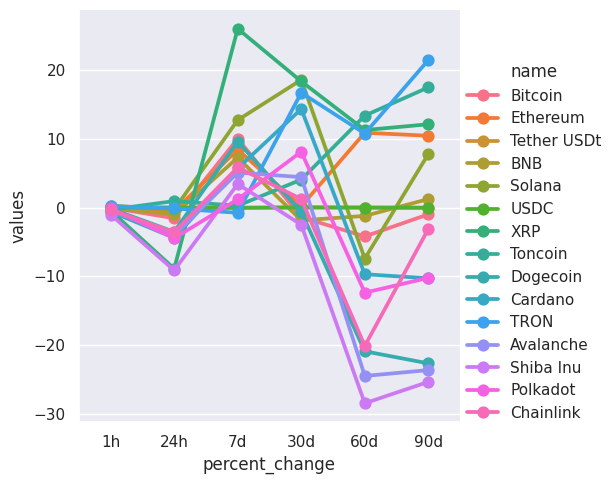

In [51]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [52]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,63567.703892,2024-07-18 19:09:08.441989
15,Bitcoin,63567.703892,NaT
30,Bitcoin,63532.876009,NaT


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

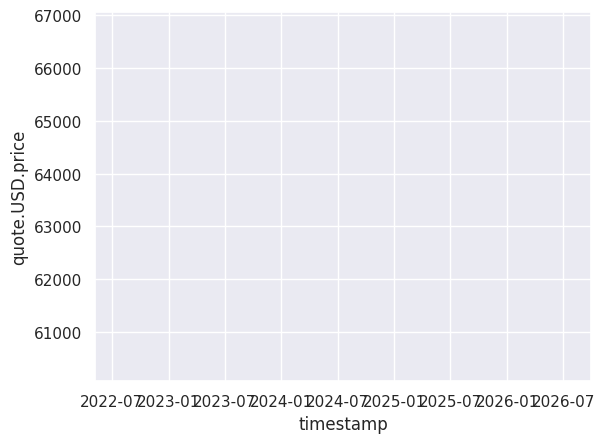

In [53]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)